# Seaborn Basics


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The goal of this exercise is to analyze restaurant's invoices and tips.

In [2]:
df = sns.load_dataset('tips')

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape

(244, 7)

## 1. Counting number of datapoints
---

❓ **On which day of the week are there more reservations at the restaurant?**
- Show this with a Seaborn "Countplot"
- Arrange days in week order
- Don't use rainbow colors

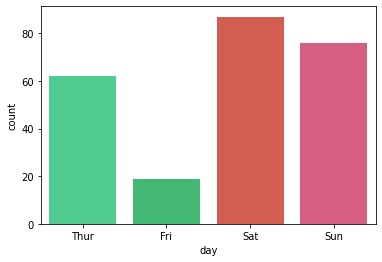

In [26]:
# Your code here
sns.countplot(x='day', data=df, palette=sns.color_palette(["#3ddf90","#2ecc71","#e74c3c","#e74c7c"]));

---

❓ Add a second breakdown with (`sex`, `smoker` or `time`) on top of the `day` dimension in a visually meaningful manner

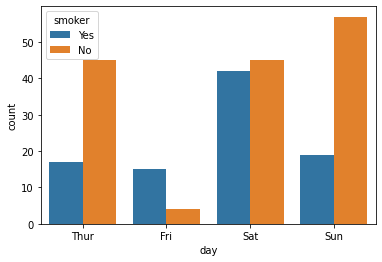

In [6]:
# Your plot here
sns.countplot(x='day', hue='smoker', data=df);

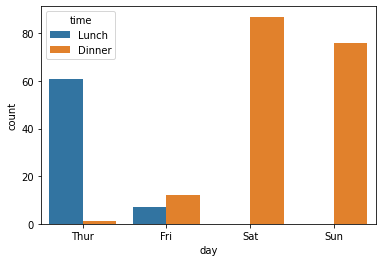

In [7]:
# Your plot here
sns.countplot(x='day', hue='time', data=df);

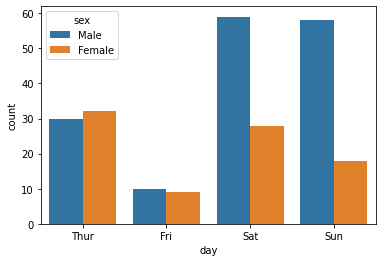

In [8]:
# Your plot here
sns.countplot(x='day', hue='sex', data=df);

## 2. Plotting distributions of numeric values

Let's now analyse the `tips` values.

### 2.1 Simple distribution

❓ Plot a histogram with seaborn and try out different number of `bins`. Try to overlay the powerful kernel density estimator `kde` on top of the histogram

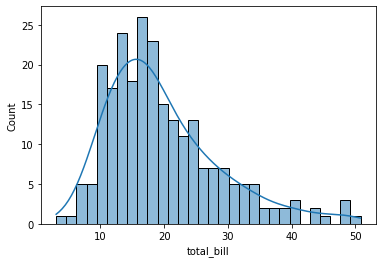

In [9]:
# Your plot here
sns.histplot(data=df, x='total_bill', bins=30, kde=True);

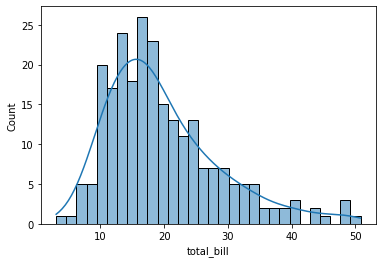

In [29]:
# Your plot here
sns.histplot(df.total_bill, bins=30, kde=True);

### 2.1 Multiple distribution, same ax

❓ Try to reproduce the graph below, and make sure to understand the different `kinds` of catplots (`"bar"`, `"box"`, `"violin"`, `"boxen"`)

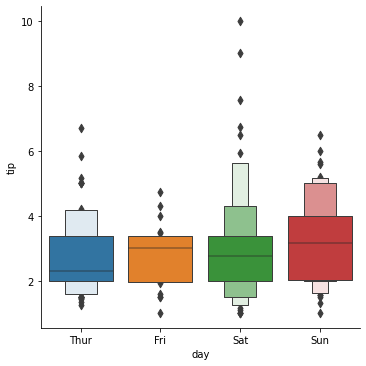

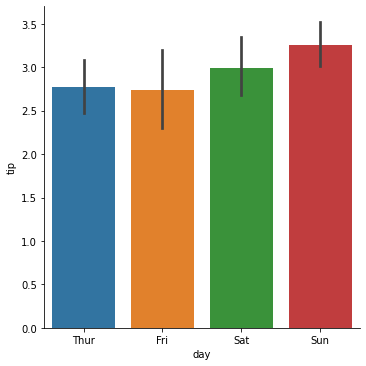

In [10]:
# Your plot here
sns.catplot(x='day', y='tip', data=df, kind="bar");

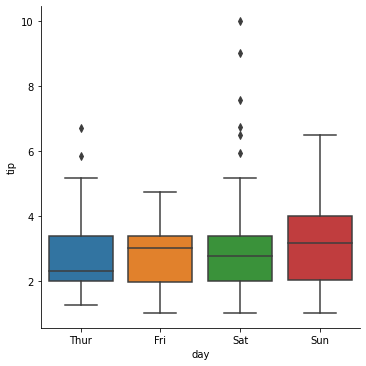

In [11]:
# Your plot here
sns.catplot(x='day', y='tip', data=df, kind="box");

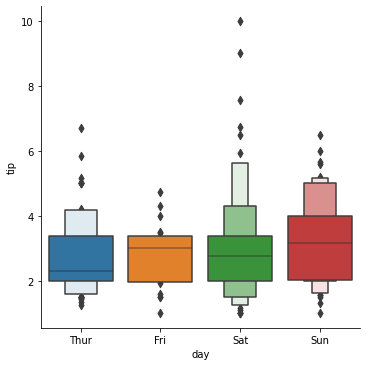

In [12]:
# Your plot here
sns.catplot(x='day', y='tip', data=df, kind="boxen");

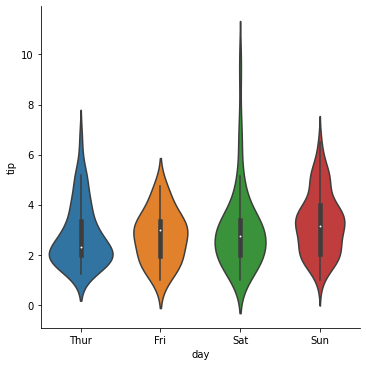

In [13]:
# Your plot here
sns.catplot(x='day', y='tip', data=df, kind="violin");

### 2.2 FacetGrid of distributions

❓ Let's look into the powerful [`seaborn.FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

1. Run the cell below. What do you observe?
2. Change `plt.hist` inside `g.map` to another plotting function (like `sns.histplot` with `kde=True`, or even a bi-variate function like `sns.scatterplot`). Make sure to understand how this works!

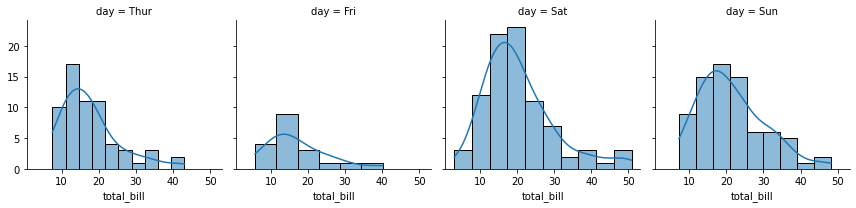

In [14]:
g = sns.FacetGrid(df, col="day")
g.map(sns.histplot, 'total_bill', kde=True);

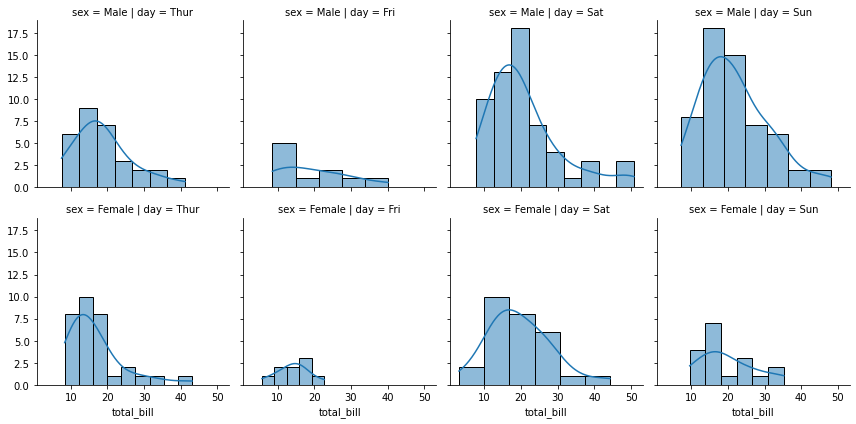

In [15]:
g = sns.FacetGrid(df, col="day", row='sex')
g.map(sns.histplot, 'total_bill', kde=True);

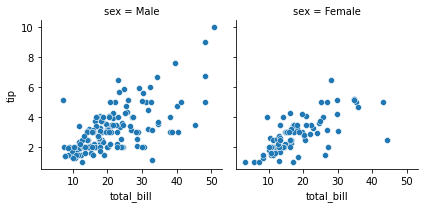

In [16]:
g = sns.FacetGrid(df, col="sex")
g.map(sns.scatterplot, 'total_bill', 'tip');

---
❓ Let's add a `row="smoker"` and `hue="smoker"` parameter. 

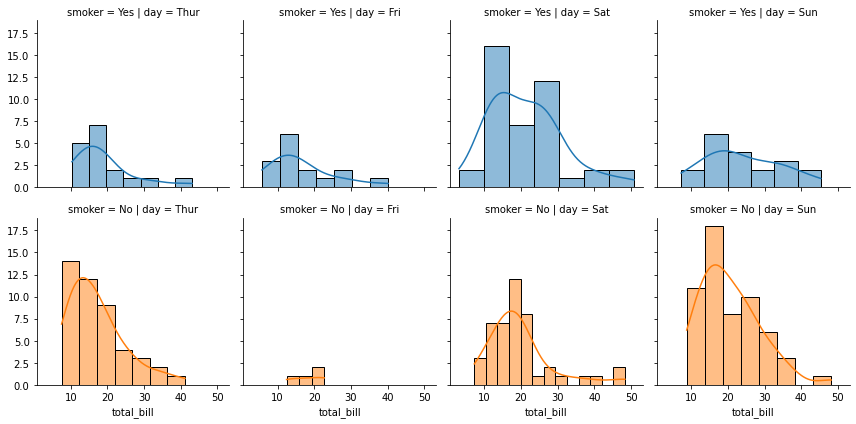

In [17]:
# Your plot here
g = sns.FacetGrid(df, col="day", row="smoker", hue="smoker")
g.map(sns.histplot, 'total_bill', kde=True);

## Correlations

Let's start looking for correlation between  `tip` and `total_bill`


❓ First, *regress `tip`on `total_bill`* (scatterplot of `tips` on y-axis versus `total_bill` on x)

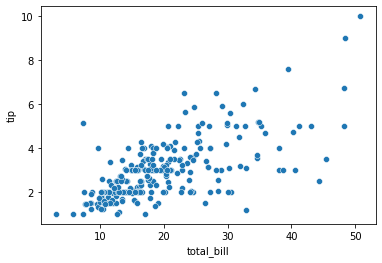

In [18]:
# Your plot here
sns.scatterplot(y='tip', x='total_bill', data=df);

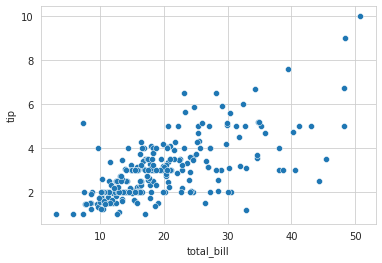

In [30]:
# Your plot here
with sns.axes_style(style="whitegrid"):
    sns.scatterplot(y='tip', x='total_bill', data=df);

---
❓ Another beautiful way of looking at this data is to use the [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

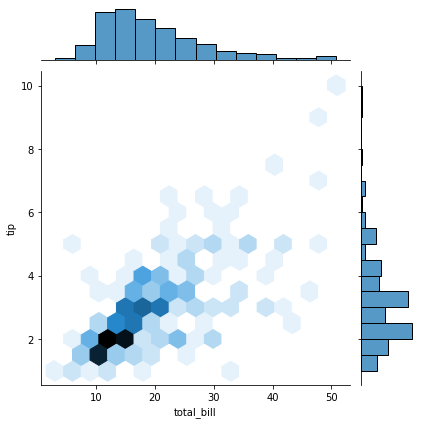

In [19]:
# Your plot here
sns.jointplot(y='tip', x='total_bill', data=df, kind='hex');

❓ Let's now compute a simple linear regression curve using `sns.regplot()`

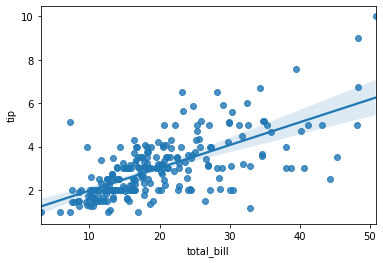

In [20]:
# Your plot here
sns.regplot(y='tip', x='total_bill', data=df);

❓Now, try also to use a `FacetGrid` to plot two regplots (one for smokers only, one for non-smokers). What conclusion can you draw?

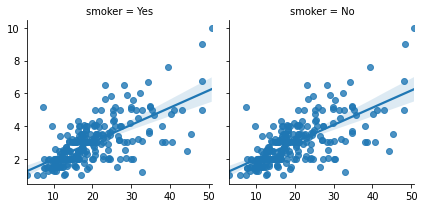

In [33]:
# Your plot here
g = sns.FacetGrid(df, col='smoker')
g.map(sns.regplot, y='tip', x='total_bill', data=df);

In [34]:
# ====> Same plot !!!!  FALSE

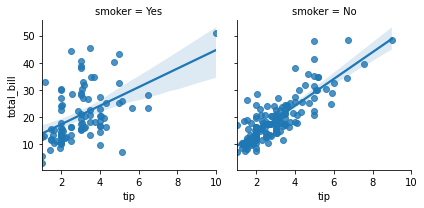

In [35]:
#  correction
g = sns.FacetGrid(df, col='smoker')
g.map(sns.regplot, 'tip', 'total_bill');

## DataFrame-wide analysis with pairplot

❓ A very useful tool to identify **all correlations between all pairs of dataframe's columns** is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

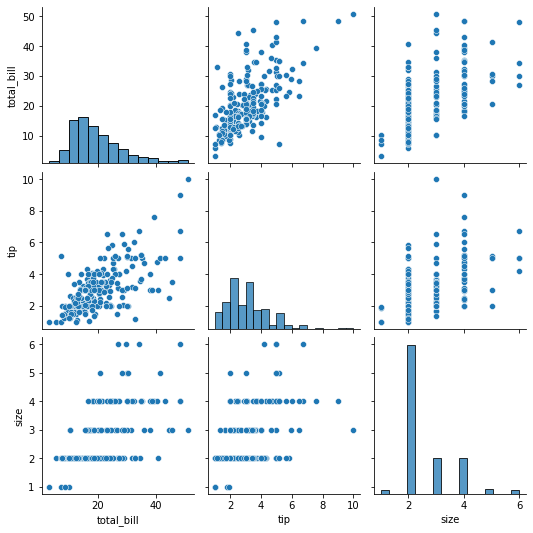

In [23]:
# Your plot here
sns.pairplot(df);

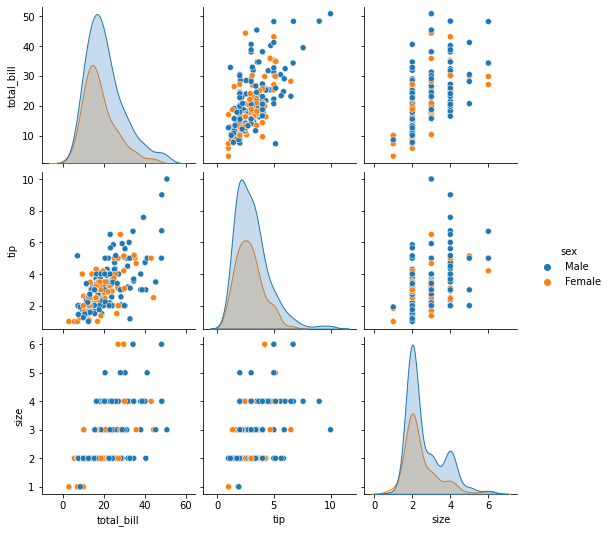

In [24]:
sns.pairplot(df, hue="sex", height=2.5);